# Exercise: Text Mining

 

Gunakan dataset Tweets.csv

 

Dataset ini berisi tweet yang ditujukan (mention) ke beberapa maskapai di US. 

Anda bekerja sebagai data scientist yang ditugaskan untuk memprediksi apakah sebuah tweet termasuk ke dalam sentiment negative (class 1) atau positive or neutral (class 0). 

Tujuan dari klasifikasi tweet ini adalah untuk memberikan alarm/warning ketika muncul sebuah tweet negatif sehingga tim PR (Public Relation) bisa menghandle tweet negatif tsb dengan cepat.

 

- Lakukan preprocessing pada semua tweet 

- Lakukan EDA. Apakah ada perbedaan antara tweet dengan sentiment negative (class 1) dengan tweet dengan sentiment positive or neutral (class 0)?

- Definisikan FP dan FN dalam kasus sentiment analysis ini

- Tentukan metric yang cocok untuk kasus ini

In [1]:
# general librariers
import pandas as pd
import numpy as np
# visualisations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [4]:
df['airline_sentiment'] = np.where((df['airline_sentiment'] == 'neutral'), 'positive', df['airline_sentiment'])

In [5]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
positive    5462
Name: count, dtype: int64

In [6]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
positive    5462
Name: count, dtype: int64

In [7]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
df.isna().sum()/df.shape[0]*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [9]:
df.duplicated().sum()

37

In [10]:
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,positive,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Preprocessing

## 1. Lowercase

In [11]:
to_lower = lambda text: text.lower()

## 2. Contraction

In [12]:
import contractions

In [13]:
# contractions.fix()

## 3. Remove Number

In [14]:
def remove_number(text): return ''.join(i for i in text if not i.isdigit())

## 4. Remove Punctuation

In [15]:
from string import punctuation

In [16]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
import re
def remove_punctuation(text): 
    res = re.sub('@[^\s]+','',text)
    res = ''.join(i for i in res if i not in punctuation)
    return res

In [18]:
contractions.fix("I don't care")

'I do not care'

## 5. Remove Stopwords

In [19]:
import nltk
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
# stop_words.remove("not")

In [22]:
stop_words.append('u')

In [23]:
def remove_stopwords(text): 
    return ' '.join(i for i in text.split() if i not in stop_words)

## 6. Remove Whitespace

In [24]:
def remove_whitespace(text):
    return ' '.join(text.split())

In [25]:
def cleaning_all(urdf):
    urdf['1_lower'] = urdf['text'].apply(to_lower)
    urdf['2_contraction'] = urdf['1_lower'].apply(contractions.fix)
    urdf['3_number'] = urdf['2_contraction'].apply(remove_number)
    urdf['4_punct'] = urdf['3_number'].apply(remove_punctuation)
    urdf['5_stopword'] = urdf['4_punct'].apply(remove_stopwords)
    urdf['6_white'] = urdf['5_stopword'].apply(remove_whitespace)
    return urdf
df = cleaning_all(df)
df.head()

,airline_sentiment,text,1_lower,2_contraction,3_number,4_punct,5_stopword,6_white
0,positive,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,what said,said,said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,@virginamerica plus you have added commercials...,@virginamerica plus you have added commercials...,plus you have added commercials to the experi...,plus added commercials experience tacky,plus added commercials experience tacky
2,positive,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,@virginamerica i did not today... must mean i ...,@virginamerica i did not today... must mean i ...,i did not today must mean i need to take anot...,today must mean need take another trip,today must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,@virginamerica it's really aggressive to blast...,@virginamerica it is really aggressive to blas...,@virginamerica it is really aggressive to blas...,it is really aggressive to blast obnoxious en...,really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,@virginamerica and it's a really big bad thing...,@virginamerica and it is a really big bad thin...,@virginamerica and it is a really big bad thin...,and it is a really big bad thing about it,really big bad thing,really big bad thing


## Preprocessing Part 2

Mengubah kata menjadi kata dasar

Pilihan:
- Stemming
- Lemmatization

In [26]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer

### Stemming

In [27]:
stemmer = SnowballStemmer('english')

In [28]:
def stem(text):
    list_stemmed_word = []

    for kalimat in nltk.sent_tokenize(text): # pecah paragraph menjadi kalimat
        for kata in nltk.word_tokenize(kalimat): # pecah kalimat menjadi kata
            stemmed_word = stemmer.stem(kata) # ubah kata ke kata dasarnya
            list_stemmed_word.append(stemmed_word)

    return ' '.join(list_stemmed_word)

### Lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def lemmatize(text):
    list_lemmatized_word = []

    for kalimat in nltk.sent_tokenize(text): # pecah paragraph menjadi kalimat
        for kata in nltk.word_tokenize(kalimat): # pecah kalimat menjadi kata
            lemmatized_word = lemmatizer.lemmatize(kata) # ubah kata ke kata dasarnya
            list_lemmatized_word.append(lemmatized_word)

    return ' '.join(list_lemmatized_word)

In [31]:
df['stem'] = df['6_white'].apply(stem)
df.head(2)

,airline_sentiment,text,1_lower,2_contraction,3_number,4_punct,5_stopword,6_white,stem
0,positive,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,what said,said,said,said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,@virginamerica plus you have added commercials...,@virginamerica plus you have added commercials...,plus you have added commercials to the experi...,plus added commercials experience tacky,plus added commercials experience tacky,plus ad commerci experi tacki


In [32]:
df['lemmatize'] = df['6_white'].apply(lemmatize)
df.head(2)

,airline_sentiment,text,1_lower,2_contraction,3_number,4_punct,5_stopword,6_white,stem,lemmatize
0,positive,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,what said,said,said,said,said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,@virginamerica plus you have added commercials...,@virginamerica plus you have added commercials...,plus you have added commercials to the experi...,plus added commercials experience tacky,plus added commercials experience tacky,plus ad commerci experi tacki,plus added commercial experience tacky


In [33]:
df.shape

(14640, 10)

In [34]:
df.drop_duplicates(subset='lemmatize').shape

(14138, 10)

In [35]:
df.drop_duplicates(subset='lemmatize', inplace=True)

In [36]:
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document

    df_text = df_text.reset_index()[0].value_counts()

    df_text = df_text.to_frame().reset_index()

    df_text = df_text.rename(columns={0:'word', 'count':'freq'})
    return df_text


In [37]:
word_freq(df['lemmatize'])

,word,freq
0,flight,4458
1,get,1360
2,hour,1134
3,thanks,1067
4,cancelled,1030
...,...,...
12616,httptcopdntgbxc,1
12617,deed,1
12618,curse,1
12619,notmadeofmoney,1


In [38]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9034
positive    5104
Name: count, dtype: int64

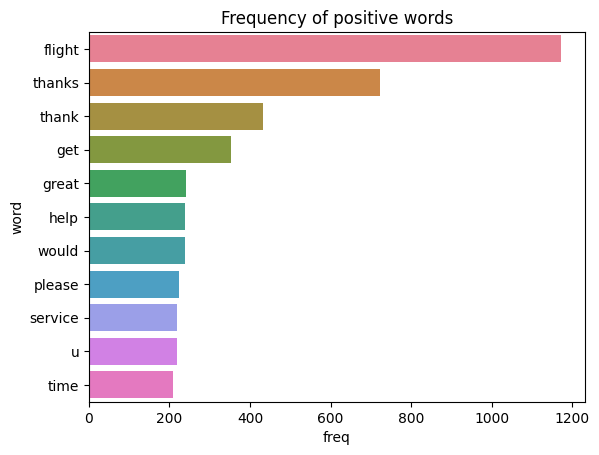

In [39]:
# Top 10 most frequent words

spam_data = df[df['airline_sentiment'] == 'positive']['lemmatize']
plt.title("Frequency of positive words")

sns.barplot(
    data=word_freq(spam_data).loc[:10],
    x='freq',
    y='word',
    hue='word'
)
plt.show()

<Axes: title={'center': 'Frequency of negative words'}, xlabel='freq', ylabel='word'>

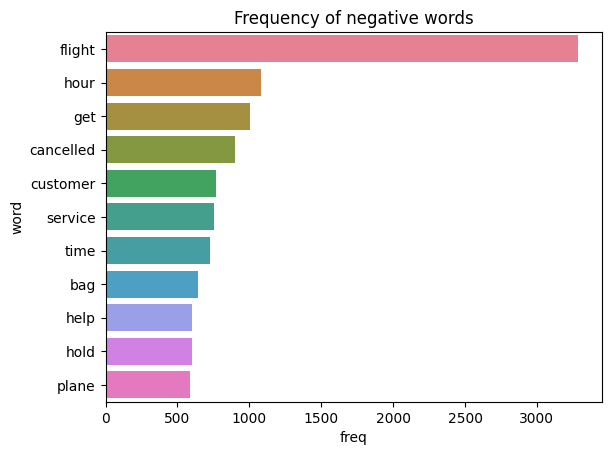

In [40]:
# Top 10 most frequent words

not_spam_data = df[df['airline_sentiment'] == 'negative']['lemmatize']
plt.title("Frequency of negative words")

sns.barplot(
    data=word_freq(not_spam_data).loc[:10],
    x='freq',
    y='word',
    hue='word'
)

Insight

- Pada tweet positive paling sering muncul kata: flight, thanks, thank
- pada tweet negative paling sering muncul kata: flight, hour, get
- kata 'flight','u', 'get' jika mau dianggap sebagai stopwords, maka bisa kita hapus

## 2. Length of Document

In [41]:
df['len_char'] = df['lemmatize'].apply(len)

In [42]:
df['len_word'] = df['lemmatize'].apply(lambda x: len(x.split()))

df.head(3)

,airline_sentiment,text,1_lower,2_contraction,3_number,4_punct,5_stopword,6_white,stem,lemmatize,len_char,len_word
0,positive,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.,what said,said,said,said,said,4,1
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,@virginamerica plus you have added commercials...,@virginamerica plus you have added commercials...,plus you have added commercials to the experi...,plus added commercials experience tacky,plus added commercials experience tacky,plus ad commerci experi tacki,plus added commercial experience tacky,38,5
2,positive,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,@virginamerica i did not today... must mean i ...,@virginamerica i did not today... must mean i ...,i did not today must mean i need to take anot...,today must mean need take another trip,today must mean need take another trip,today must mean need take anoth trip,today must mean need take another trip,38,7


# EDA

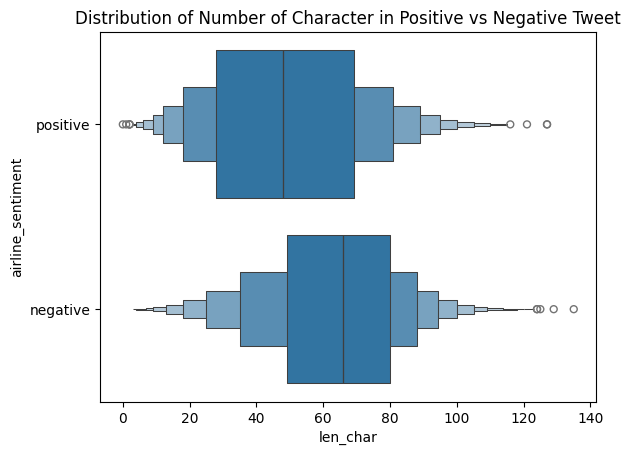

In [43]:
plt.title('Distribution of Number of Character in Positive vs Negative Tweet')
sns.boxenplot(data=df, x='len_char', y='airline_sentiment');

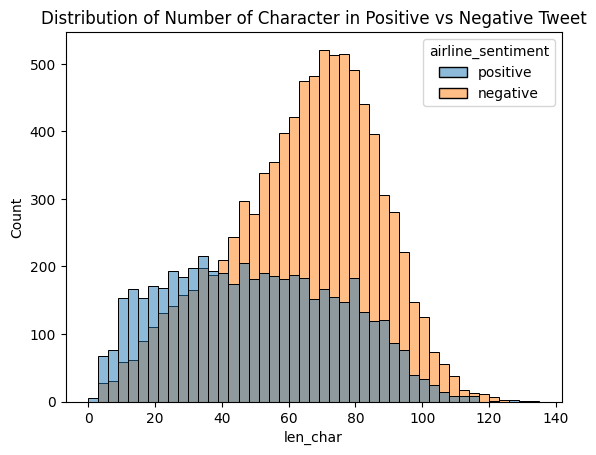

In [44]:
plt.title('Distribution of Number of Character in Positive vs Negative Tweet')
sns.histplot(data=df, x='len_char', hue='airline_sentiment');

Insight:
- Tweet Negatif cenderung lebih banyak jumlah karakternya dibanding Tweet Positif

Tujuan dari klasifikasi tweet ini adalah untuk memberikan alarm/warning ketika muncul sebuah tweet negatif sehingga tim PR (Public Relation) bisa menghandle tweet negatif tsb dengan cepat.

**Tujuan selalu berada di positif**, karena tujuannya itu tweet negatif maka :

- class 0 (1) : itu merupakan tweet positif

- class 1 (+) : itu merupakan tweet negatif

berdasarkan tujuan dari klasifikasi ini akan lebih baik jika menggunakan recall karena ingin mencegah terjadinya error pada FN

FP: Diprediksi tweet negatif -> alarm nyala -> actualnya tweet positive -> cost : waktu untuk cek tweet

FN: Diprediksi tweet positif -> alarm tidak menyala -> actualnya tweet negatif -> cost : tweet negatif tidak di handle (merusak reputasi)

---
# Bag of Words (Document Term Matrix)

- TF (Term Frequency)
- TF-IDF (Term Frequency - Inverse Document Frequency)


In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Vectorizer

## 1. TF (Term Frequency)

CountVectorizer

Berapa kali sebuah kata muncul dalam sebuah dokumen (tweet/email/dll)


In [46]:
# define vectorizer
vect_tf = CountVectorizer(ngram_range=(1,1))

## 2. TF-IDF

- TF -> Semakin sering sebuah kata muncul dalam 1 dokumen, maka skornya semakin besar
- IDF -> semakin sering sebuah kata muncul dalam banyak dokumen (katanya semakin pasar), skornya semakin kecil

In [47]:
# define vectorizer
vect_tfidf = TfidfVectorizer(norm=None, ngram_range=(1,1))

In [48]:
# Load Dataset
df_clean = df[['lemmatize', 'airline_sentiment']].copy()
df_clean.head()

,lemmatize,airline_sentiment
0,said,positive
1,plus added commercial experience tacky,positive
2,today must mean need take another trip,positive
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


In [49]:
df_clean['airline_sentiment'] = np.where(df_clean['airline_sentiment'] == 'negative', 1, 0)

df_clean.head()

,lemmatize,airline_sentiment
0,said,0
1,plus added commercial experience tacky,0
2,today must mean need take another trip,0
3,really aggressive blast obnoxious entertainmen...,1
4,really big bad thing,1


In [50]:
X = df_clean['lemmatize']
y = df_clean['airline_sentiment']

In [51]:
y.value_counts()/len(y) * 100 # imbalance

airline_sentiment
1    63.898713
0    36.101287
Name: count, dtype: float64

## Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    stratify=y,
    test_size=0.2,
    random_state=0)

In [54]:
# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, TimeSeriesSplit

In [56]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [57]:
# algo
logreg = LogisticRegression(solver="liblinear", random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

In [58]:
# Voting Classifier
voting = VotingClassifier(estimators=[
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
])

# Stacking Classifier
stacking = StackingClassifier(estimators=[
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
], 
final_estimator=logreg # digunakan untuk meta learner
)

In [59]:
# cross validation memilih model terbaik berdasarkan mae
models = [logreg, knn, tree, voting, stacking]

list_all = []
list_mean = []
list_std = []

# mencari model terbaik berdasarkan MAE terkecil
for i in models:

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    pipe_model = Pipeline([
                        ('preprocess', vect_tf),
                        ('model', i)
                    ])

    # cross val
    # cross_validate untuk menghitung skor untuk beberapa metrik
    cv_score = cross_val_score(
        estimator = pipe_model, 
        X = X_train, # menggunakan X_train awal (karena transform dan scaling dilakukan di Pipeline)
        y = y_train, 
        cv = 5,
        scoring = 'recall',
        error_score = "raise",
        n_jobs = -1
    )
    
    list_all.append(cv_score.round(4))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [60]:
df_cv = pd.DataFrame()
df_cv['algo'] = models
df_cv['all']= list_all
df_cv['mean'] = list_mean
df_cv['std'] = list_std

df_cv

,algo,all,mean,std
0,"LogisticRegression(random_state=0, solver='lib...","[0.8491, 0.8533, 0.8685, 0.888, 0.8534]",0.862458,0.014361
1,KNeighborsClassifier(),"[0.4547, 0.4457, 0.3986, 0.4246, 0.3658]",0.417884,0.032407
2,"DecisionTreeClassifier(max_depth=5, random_sta...","[0.9522, 0.964, 0.9654, 0.971, 0.9599]",0.962501,0.006230
3,"VotingClassifier(estimators=[('clf1',\n ...","[0.8533, 0.8491, 0.8616, 0.8817, 0.8485]",0.858861,0.012354
4,"StackingClassifier(estimators=[('clf1',\n ...","[0.8588, 0.8554, 0.8754, 0.8949, 0.8686]",0.870621,0.014056


## Hyperparameter Tuning

In [61]:
y_test.value_counts()

airline_sentiment
1    1807
0    1021
Name: count, dtype: int64

In [62]:
# oversampling
smote = SMOTE(random_state=0, sampling_strategy= "minority" )

In [63]:
# undersampling
nearmiss = NearMiss(sampling_strategy="majority")

In [64]:
vect_tf2 = CountVectorizer(ngram_range=(2,2))
vect_tfidf2 = TfidfVectorizer(ngram_range=(2,2), norm=None)
# param_grid
hyperparam = {
    "modeling__max_depth": range(2, 31, 1),
    "modeling__criterion": ['gini', 'entropy', 'log_loss'],
    "modeling__min_samples_split": range(2, 50, 1),
    "modeling__min_samples_leaf": range(2, 50, 1),
    "resampling": [smote, nearmiss],
    # "vect__ngram_range" : [(1,1),(2,2)],
    "vect": [vect_tf, vect_tf2, vect_tfidf, vect_tfidf2]
}

# pipeline
pipe_model = Pipeline([
    ("vect", None),
    ('resampling', None),
    ("modeling", tree)
])

# tuning -> gridsearchcv
randomsearch = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions =hyperparam,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    n_iter=100,
    random_state=0
)

In [65]:
randomsearch.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect', None),
                                             ('resampling', None),
                                             ('modeling',
                                              DecisionTreeClassifier(max_depth=5,
                                                                     random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'modeling__criterion': ['gini',
                                                                'entropy',
                                                                'log_loss'],
                                        'modeling__max_depth': range(2, 31),
                                        'modeling__min_samples_leaf': range(2, 50),
                                        'modeling__min_samples_split': range(2, 50),
                                        'resampling': [SMOTE(random_state=0,
                                                             sampling_strategy='minority'),
                                                       NearMiss(sampling_strategy='majority')],
                                        'vect': [CountVectorizer(),
                                                 CountVectorizer(ngram_range=(2,
                                                                              2)),
                                                 TfidfVectorizer(norm=None),
                                                 TfidfVectorizer(ngram_range=(2,
                                                                              2),
                                                                 norm=None)]},
                   random_state=0, scoring='recall')

In [76]:
# mendapatkan hasil parameter yang terbaik
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect,param_resampling,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_depth,param_modeling__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,0.750471,0.102376,0.013160,0.003598,CountVectorizer(),NearMiss(sampling_strategy='majority'),28,7,2,entropy,"{'vect': CountVectorizer(), 'resampling': Near...",0.959862,0.971626,0.971626,0.967497,0.966805,0.967483,0.004310,1
15,0.573973,0.008334,0.015691,0.005228,TfidfVectorizer(norm=None),"SMOTE(random_state=0, sampling_strategy='minor...",9,40,5,entropy,"{'vect': TfidfVectorizer(norm=None), 'resampli...",0.951557,0.970242,0.965398,0.963347,0.960581,0.962225,0.006199,2
59,0.939578,0.095348,0.011759,0.001518,CountVectorizer(),NearMiss(sampling_strategy='majority'),2,19,3,log_loss,"{'vect': CountVectorizer(), 'resampling': Near...",0.952249,0.966090,0.962630,0.963347,0.955740,0.960011,0.005166,3
62,0.536093,0.024337,0.014927,0.003321,TfidfVectorizer(norm=None),"SMOTE(random_state=0, sampling_strategy='minor...",25,48,3,entropy,"{'vect': TfidfVectorizer(norm=None), 'resampli...",0.947405,0.960554,0.957093,0.963347,0.955740,0.956828,0.005412,4
87,0.344816,0.023308,0.012829,0.002858,CountVectorizer(),"SMOTE(random_state=0, sampling_strategy='minor...",47,17,28,log_loss,"{'vect': CountVectorizer(), 'resampling': SMOT...",0.677509,0.686505,0.703114,0.705394,0.654910,0.685486,0.018475,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.356033,0.032776,0.025463,0.007204,"CountVectorizer(ngram_range=(2, 2))","SMOTE(random_state=0, sampling_strategy='minor...",24,10,3,entropy,"{'vect': CountVectorizer(ngram_range=(2, 2)), ...",0.142561,0.132872,0.153633,0.150069,0.134163,0.142660,0.008286,96
65,0.260275,0.022035,0.020876,0.004961,"CountVectorizer(ngram_range=(2, 2))","SMOTE(random_state=0, sampling_strategy='minor...",2,8,3,gini,"{'vect': CountVectorizer(ngram_range=(2, 2)), ...",0.142561,0.132872,0.153633,0.150069,0.134163,0.142660,0.008286,96
16,0.276917,0.015044,0.020389,0.003677,"CountVectorizer(ngram_range=(2, 2))","SMOTE(random_state=0, sampling_strategy='minor...",42,19,2,entropy,"{'vect': CountVectorizer(ngram_range=(2, 2)), ...",0.103114,0.091349,0.099654,0.101660,0.097510,0.098658,0.004113,98
54,1.077123,0.022111,0.025241,0.003827,"CountVectorizer(ngram_range=(2, 2))",NearMiss(sampling_strategy='majority'),2,39,4,log_loss,"{'vect': CountVectorizer(ngram_range=(2, 2)), ...",0.108651,0.062284,0.072664,0.074689,0.079530,0.079563,0.015595,99


In [77]:
# nilai terbaik dari parameter
randomsearch.best_params_ 

{'vect': CountVectorizer(),
 'resampling': NearMiss(sampling_strategy='majority'),
 'modeling__min_samples_split': 28,
 'modeling__min_samples_leaf': 7,
 'modeling__max_depth': 2,
 'modeling__criterion': 'entropy'}

In [78]:
# best estimator
randomsearch.best_estimator_

Pipeline(steps=[('vect', CountVectorizer()),
                ('resampling', NearMiss(sampling_strategy='majority')),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                        min_samples_leaf=7,
                                        min_samples_split=28,
                                        random_state=0))])

## Predict to test

In [79]:
# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

Before tuning

In [80]:
model = Pipeline([
    ("vect", vect_tf),
    ("modeling", tree)
])
model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)
recall_score(y_test, y_pred_before)

0.9623685666851135

After tuning

In [81]:
model_tuning = randomsearch.best_estimator_
model_tuning.fit(X_train, y_train)
y_pred_after = model_tuning.predict(X_test)
recall_score(y_test, y_pred_after)

0.9690094078583287

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [89]:
cf_before=confusion_matrix(y_test, y_pred_before)
cf_before

array([[ 213,  808],
       [  68, 1739]])

In [90]:
cf_after = confusion_matrix(y_test, y_pred_after)
cf_after

array([[ 132,  889],
       [  56, 1751]])

In [86]:
print(classification_report(y_test, y_pred_before))

              precision    recall  f1-score   support

           0       0.76      0.21      0.33      1021
           1       0.68      0.96      0.80      1807

    accuracy                           0.69      2828
   macro avg       0.72      0.59      0.56      2828
weighted avg       0.71      0.69      0.63      2828



In [85]:
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.70      0.13      0.22      1021
           1       0.66      0.97      0.79      1807

    accuracy                           0.67      2828
   macro avg       0.68      0.55      0.50      2828
weighted avg       0.68      0.67      0.58      2828



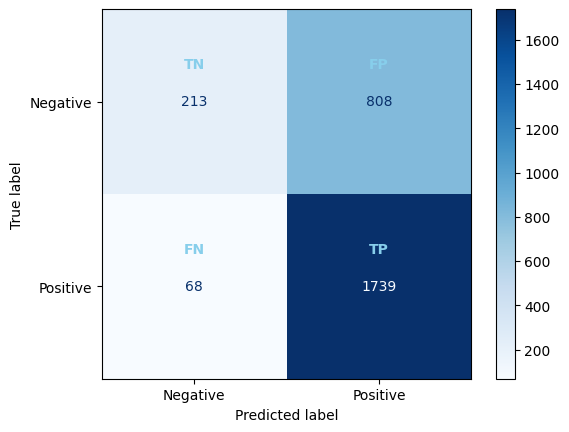

In [91]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cf_before, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='skyblue', fontweight='bold')

# Show the plot
plt.show()

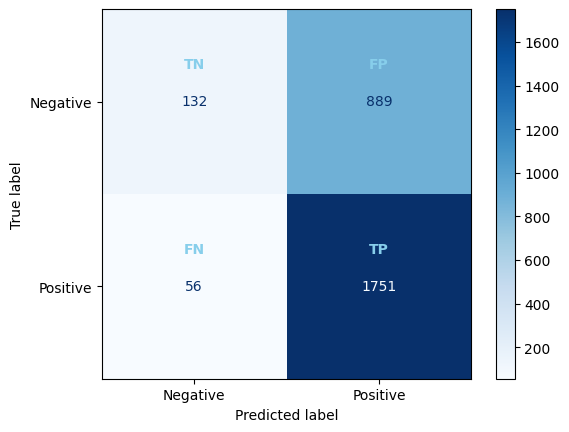

In [92]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cf_after, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='skyblue', fontweight='bold')

# Show the plot
plt.show()

FP: Diprediksi tweet negatif -> alarm nyala -> actualnya tweet positive -> cost : waktu untuk cek tweet

FN: Diprediksi tweet positif -> alarm tidak menyala -> actualnya tweet negatif -> cost : tweet negatif tidak di handle (merusak reputasi)

# Conclusion

Berdasarkan kedua confusion matrix (before dan after), kita berhasil mengurangi resiko terjadinya salah memprediksi negatif yang tidak dihandle. Dari 68 menjadi 56, sehingga setidaknya kita terlalu merusak reputasi